In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('all_zeroshot_results.csv')

# Create length bins
length_bin_edges = [0, 24, 30, 35, 39, 45, 54, 63, 73, 88, 179]
length_bin_labels = [
    'Bin 0:\n0-24', 'Bin 1:\n25-30', 'Bin 2:\n31-35', 'Bin 3:\n36-39', 'Bin 4:\n40-45',
    'Bin 5:\n46-54', 'Bin 6:\n55-63', 'Bin 7:\n64-73', 'Bin 8:\n74-88', 'Bin 9:\n89-179'
]

# Assign length bins
df['length_bin'] = pd.cut(df['length'], bins=length_bin_edges, labels=length_bin_labels)

# Calculate accuracy by length bin
length_accuracy = pd.DataFrame(index=length_bin_labels)
for model in ['gemini', 'gpt']:
    # Use observed=True to suppress the warning
    grouped = df.groupby('length_bin', observed=True)[f'correctness_{model}']
    length_accuracy[f'{model}_accuracy'] = grouped.mean()
    length_accuracy[f'{model}_count'] = grouped.count()

print(length_accuracy)

                gemini_accuracy  gemini_count  gpt_accuracy  gpt_count
Bin 0:\n0-24           0.333333           102      0.568627        102
Bin 1:\n25-30          0.373737            99      0.494949         99
Bin 2:\n31-35          0.434343            99      0.595960         99
Bin 3:\n36-39          0.437500            96      0.458333         96
Bin 4:\n40-45          0.520833            96      0.541667         96
Bin 5:\n46-54          0.462366            93      0.559140         93
Bin 6:\n55-63          0.525253            99      0.535354         99
Bin 7:\n64-73          0.482759            87      0.551724         87
Bin 8:\n74-88          0.583333            96      0.625000         96
Bin 9:\n89-179         0.574713            87      0.632184         87


In [5]:

# Create parse depth bins 
# Individual bins for 2-8, and one bin for 9-13
def assign_parse_depth_bin(depth):
    if 2 <= depth <= 8:
        return f"{depth}"
    elif 9 <= depth <= 13:
        return "9-13"
    else:
        return None

df['parse_depth_bin'] = df['parse_depth'].apply(assign_parse_depth_bin)

# Calculate counts for parse depth bins to add to labels
parse_depth_counts = df.groupby('parse_depth_bin').size()
parse_depth_bin_labels = [f"{bin}\n(n={parse_depth_counts[bin]})" for bin in parse_depth_counts.index]

# Calculate accuracy by parse depth bin
parse_depth_accuracy = pd.DataFrame()
for model in ['gemini', 'gpt']:
    grouped = df.groupby('parse_depth_bin')[f'correctness_{model}'].agg(['mean', 'count'])
    parse_depth_accuracy[f'{model}_accuracy'] = grouped['mean']
    parse_depth_accuracy[f'{model}_count'] = grouped['count']
    #make each count = count/3
    parse_depth_accuracy[f'{model}_count'] = parse_depth_accuracy[f'{model}_count'] / 3
print(parse_depth_accuracy)

                 gemini_accuracy  gemini_count  gpt_accuracy  gpt_count
parse_depth_bin                                                        
2                       0.333333           5.0      0.733333        5.0
3                       0.354497          63.0      0.518519       63.0
4                       0.523148          72.0      0.550926       72.0
5                       0.457364          86.0      0.565891       86.0
6                       0.543860          38.0      0.552632       38.0
7                       0.507937          21.0      0.619048       21.0
8                       0.550000          20.0      0.583333       20.0
9-13                    0.487179          13.0      0.487179       13.0


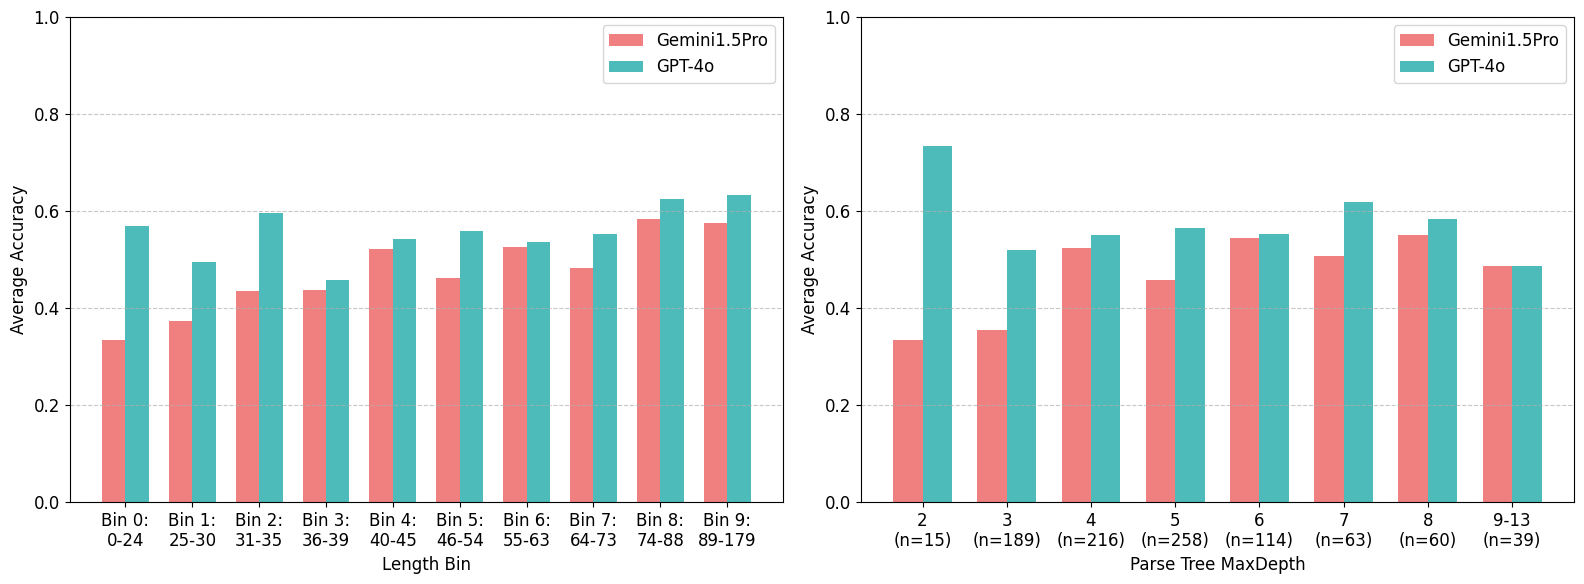

In [7]:

# Plot settings
plt.rcParams.update({'font.size': 12})
width = 0.35  # width of the bars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Accuracy by pattern length
x = np.arange(len(length_bin_labels))
ax1.bar(x - width/2, length_accuracy['gemini_accuracy'], width, label='Gemini1.5Pro', color='#f08080')
ax1.bar(x + width/2, length_accuracy['gpt_accuracy'], width, label='GPT-4o', color='#4dbbba')

# Configure plot 1
ax1.set_ylim(0, 1.0)
ax1.set_ylabel('Average Accuracy')
ax1.set_xlabel('Length Bin')
ax1.set_xticks(x)
ax1.set_xticklabels(length_bin_labels)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend()
# ax1.set_title('Figure 4: Accuracy by pattern length.')

# Plot 2: Accuracy by pattern parse tree depth
x2 = np.arange(len(parse_depth_bin_labels))
ax2.bar(x2 - width/2, parse_depth_accuracy['gemini_accuracy'], width, label='Gemini1.5Pro', color='#f08080')
ax2.bar(x2 + width/2, parse_depth_accuracy['gpt_accuracy'], width, label='GPT-4o', color='#4dbbba')

# Configure plot 2
ax2.set_ylim(0, 1.0)
ax2.set_ylabel('Average Accuracy')
ax2.set_xlabel('Parse Tree MaxDepth')
ax2.set_xticks(x2)
ax2.set_xticklabels(parse_depth_bin_labels)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend()
# ax2.set_title('Figure 5: Accuracy by pattern parse tree depth.')

plt.tight_layout()
plt.savefig('accuracy_plots.png', dpi=300, bbox_inches='tight')
plt.show()


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Configure high-quality plotting settings
plt.rcParams.update({
    'font.size': 12,
    'pdf.fonttype': 42,      # Use TrueType fonts in PDF
    'ps.fonttype': 42,
    'figure.dpi': 300,       # On-screen display
    'text.usetex': False,
})

# Width of bars
width = 0.35

# --- Plot 1: Accuracy by pattern length ---
fig1, ax1 = plt.subplots(figsize=(8, 6))  # One figure for the first plot
x = np.arange(len(length_bin_labels))
ax1.bar(x - width/2, length_accuracy['gemini_accuracy'], width, label='Gemini1.5Pro', color='#f08080')
ax1.bar(x + width/2, length_accuracy['gpt_accuracy'], width, label='GPT-4o', color='#4dbbba')

ax1.set_ylim(0, 1.0)
ax1.set_ylabel('Average Accuracy')
ax1.set_xlabel('Length Bin')
ax1.set_xticks(x)
ax1.set_xticklabels(length_bin_labels)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend()
# ax1.set_title('Figure 4: Accuracy by pattern length.')

plt.tight_layout()
plt.savefig('accuracy_by_length.pdf', bbox_inches='tight')
plt.close(fig1)

# --- Plot 2: Accuracy by parse tree depth ---
fig2, ax2 = plt.subplots(figsize=(8, 6))  # One figure for the second plot
x2 = np.arange(len(parse_depth_bin_labels))
ax2.bar(x2 - width/2, parse_depth_accuracy['gemini_accuracy'], width, label='Gemini1.5Pro', color='#f08080')
ax2.bar(x2 + width/2, parse_depth_accuracy['gpt_accuracy'], width, label='GPT-4o', color='#4dbbba')

ax2.set_ylim(0, 1.0)
ax2.set_ylabel('Average Accuracy')
ax2.set_xlabel('Parse Tree MaxDepth')
ax2.set_xticks(x2)
ax2.set_xticklabels(parse_depth_bin_labels)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend()
# ax2.set_title('Figure 5: Accuracy by pattern parse tree depth.')

plt.tight_layout()
plt.savefig('accuracy_by_parse_depth.pdf', bbox_inches='tight')
plt.close(fig2)


/tmp/ipykernel_1159821/1844238784.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('length_bin')[f'correctness_{model}']
/tmp/ipykernel_1159821/1844238784.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('length_bin')[f'correctness_{model}']


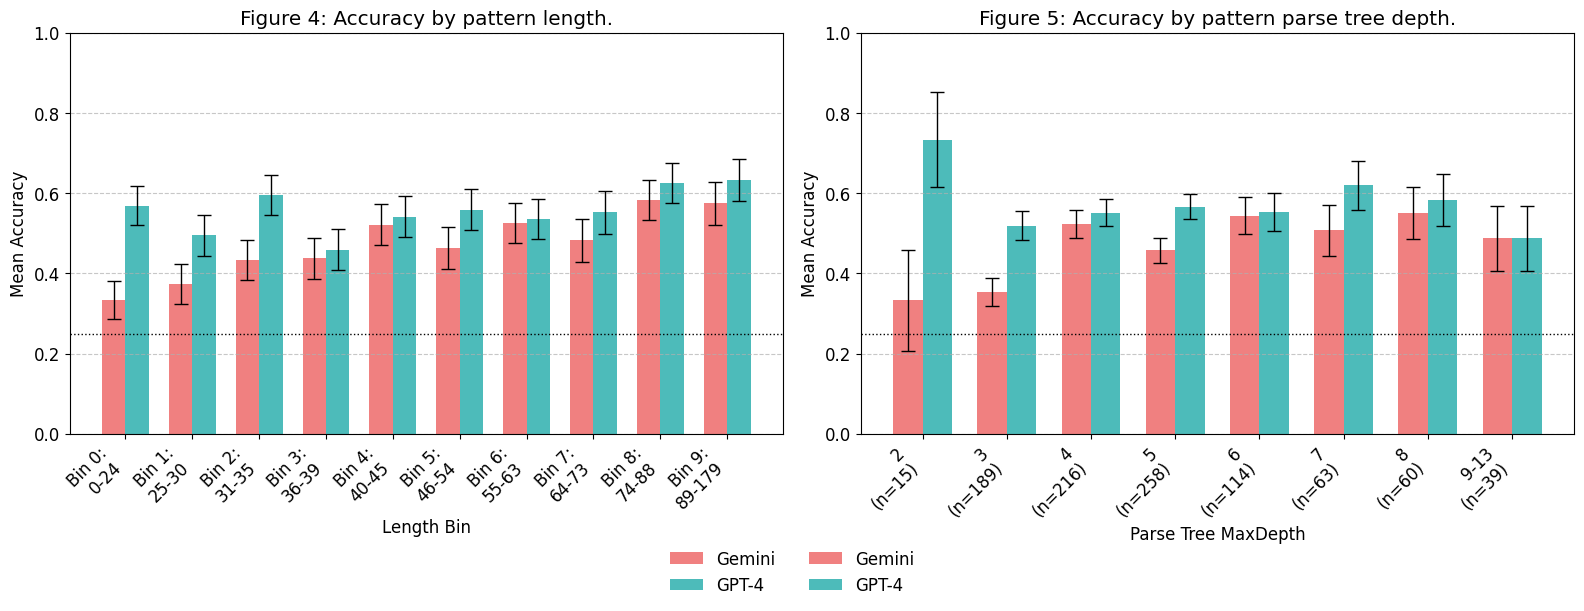

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('all_zeroshot_results_updated.csv')

# Create length bins
length_bin_edges = [0, 24, 30, 35, 39, 45, 54, 63, 73, 88, 179]
length_bin_labels = [
    'Bin 0:\n0-24', 'Bin 1:\n25-30', 'Bin 2:\n31-35', 'Bin 3:\n36-39', 'Bin 4:\n40-45',
    'Bin 5:\n46-54', 'Bin 6:\n55-63', 'Bin 7:\n64-73', 'Bin 8:\n74-88', 'Bin 9:\n89-179'
]
df['length_bin'] = pd.cut(df['length'], bins=length_bin_edges, labels=length_bin_labels)

# Calculate accuracy and stderr by length bin
length_accuracy = pd.DataFrame(index=length_bin_labels)
for model in ['gemini', 'gpt']:
    grouped = df.groupby('length_bin')[f'correctness_{model}']
    length_accuracy[f'{model}_accuracy'] = grouped.mean()
    length_accuracy[f'{model}_stderr'] = grouped.std() / np.sqrt(grouped.count())

# Create parse depth bins
def assign_parse_depth_bin(depth):
    if 2 <= depth <= 8:
        return f"{depth}"
    elif 9 <= depth <= 13:
        return "9-13"
    else:
        return None

df['parse_depth_bin'] = df['parse_depth'].apply(assign_parse_depth_bin)

# Get labels with counts
parse_depth_counts = df['parse_depth_bin'].value_counts().sort_index()
parse_depth_bin_labels = [f"{bin}\n(n={parse_depth_counts[bin]})" for bin in parse_depth_counts.index]
parse_depth_bin_keys = list(parse_depth_counts.index)

# Calculate accuracy and stderr by parse depth bin
parse_depth_accuracy = pd.DataFrame(index=parse_depth_bin_keys)
for model in ['gemini', 'gpt']:
    grouped = df.groupby('parse_depth_bin')[f'correctness_{model}']
    parse_depth_accuracy[f'{model}_accuracy'] = grouped.mean()
    parse_depth_accuracy[f'{model}_stderr'] = grouped.std() / np.sqrt(grouped.count())

# Plot settings
plt.rcParams.update({'font.size': 12})
width = 0.35
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Accuracy by length bin
x = np.arange(len(length_bin_labels))
ax1.bar(
    x - width/2,
    length_accuracy['gemini_accuracy'],
    width,
    label='Gemini',
    color='#f08080',
    yerr=length_accuracy['gemini_stderr'],
    capsize=5,
    error_kw=dict(ecolor='black', lw=1)
)
ax1.bar(
    x + width/2,
    length_accuracy['gpt_accuracy'],
    width,
    label='GPT-4',
    color='#4dbbba',
    yerr=length_accuracy['gpt_stderr'],
    capsize=5,
    error_kw=dict(ecolor='black', lw=1)
)
ax1.set_ylim(0, 1.0)
ax1.axhline(y=0.25, color='black', linestyle=':', linewidth=1)
ax1.set_ylabel('Mean Accuracy')
ax1.set_xlabel('Length Bin')
ax1.set_xticks(x)
ax1.set_xticklabels(length_bin_labels, rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_title('Figure 4: Accuracy by pattern length.')

# Plot 2: Accuracy by parse depth bin
x2 = np.arange(len(parse_depth_bin_labels))
ax2.bar(
    x2 - width/2,
    parse_depth_accuracy['gemini_accuracy'],
    width,
    label='Gemini',
    color='#f08080',
    yerr=parse_depth_accuracy['gemini_stderr'],
    capsize=5,
    error_kw=dict(ecolor='black', lw=1)
)
ax2.bar(
    x2 + width/2,
    parse_depth_accuracy['gpt_accuracy'],
    width,
    label='GPT-4',
    color='#4dbbba',
    yerr=parse_depth_accuracy['gpt_stderr'],
    capsize=5,
    error_kw=dict(ecolor='black', lw=1)
)
ax2.set_ylim(0, 1.0)
ax2.axhline(y=0.25, color='black', linestyle=':', linewidth=1)
ax2.set_ylabel('Mean Accuracy')
ax2.set_xlabel('Parse Tree MaxDepth')
ax2.set_xticks(x2)
ax2.set_xticklabels(parse_depth_bin_labels, rotation=45, ha='right')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_title('Figure 5: Accuracy by pattern parse tree depth.')

# Legend below both plots
plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.legend(
    loc='lower center',
    ncol=2,
    bbox_to_anchor=(0.5, -0.03),
    frameon=False
)

# Save high-quality PDF
plt.savefig('accuracy_plots.pdf', bbox_inches='tight')
plt.show()

